<a href="https://colab.research.google.com/github/igt14/Hypothyroidism/blob/main/Moringa_Data_Science_Module2_W3_Independent_Project_2021_10_Ian_Gathumbi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem
Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

In [1]:
# Importing the libraries we will usee
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# These are the user defined functions that we will use

# This tells us how many row and columns our dataset has
#
def rows_and_columns(df):
  return print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

# A table showing the percentage of missing values per column
#
def percent_missing_values(df):
  # Creating a dataframe showing percentage of missing values
  percentage = ((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False).to_frame()

  # Renaming the column
  percentage.columns = ['Percentage Missing']

  # Returning a dataframe with the percentage of missing values
  return percentage[percentage['Percentage Missing'] > 0]

# Checking and dropping duplicate values
#
def duplicated_records(df):

  # Number of duplicates
  duplicates = df.duplicated().sum()

  # Checking if there are duplicated values
  if df.duplicated().any() == True:

  # Dropping duplicates if found 
    df.drop_duplicates(inplace=True)
    return(f'{duplicates} duplicates dropped')
  
  # Print no duplicates if there are none
  else:
    return print('No duplicated records')

# Finding the average of elements in a list
def Average(lst):
    return sum(lst) / len(lst) 

# 2. Loading the dataset

Source: http://bit.ly/hypothyroid_data

In [3]:
# Loading our dataset
hypothyroid = pd.read_csv('/content/hypothyroid.csv', na_values='?')

In [4]:
# Shape of the datasest
rows_and_columns(hypothyroid)

The dataset has 3163 rows and 26 columns


In [5]:
# Dataset info
hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

In [6]:
# Previewing the top of our dataset
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


In [7]:
# Previewing the bottom of our dataset
hypothyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58.0,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86.0,y,0.91,y,95.0,n,NaN
3159,negative,29.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99.0,y,1.01,y,98.0,n,NaN
3160,negative,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n,NaN
3161,negative,74.0,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n,NaN
3162,negative,56.0,F,t,f,f,f,f,f,f,f,f,f,f,y,0.0,y,1.8,y,139.0,y,0.97,y,143.0,n,NaN


# 3. Data Preparation

In [8]:
# Checking for missing data
percent_missing_values(hypothyroid)

,Percentage Missing
TBG,91.779956
T3,21.972811
TSH,14.796080
age,14.100537
TT4,7.872273
T4U,7.840658
FTI,7.809042
sex,2.307936


In [9]:
# TBG column has way too many missing values so we will drop it
hypothyroid.drop(['TBG'], axis=1, inplace=True)

In [10]:
# Dropping rows with missing values
hypothyroid.dropna(inplace=True)

# Checking the shape after dropping missing values
rows_and_columns(hypothyroid)

The dataset has 2000 rows and 25 columns


In [11]:
# Checking for duplicates
duplicated_records(hypothyroid)

'54 duplicates dropped'

In [12]:
# Dropping ..._measured columns since we will not require them
hypothyroid.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured'], axis=1, inplace=True)

# 4. Exploratory Data Analysis

## 4.1 Univariate

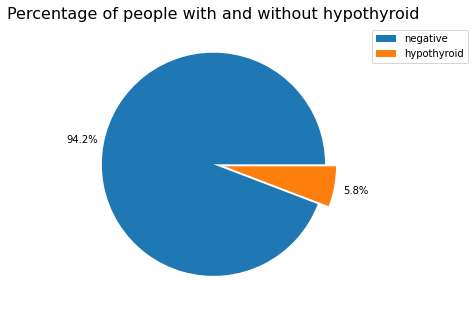

In [13]:
# A pie chart showing the percentage of patients with hypothyroidism
plt.figure(figsize=(5,6))
plt.pie(x = hypothyroid['status'].value_counts().values, autopct='%1.1f%%', pctdistance=1.2, explode=[0,0.1])
plt.legend(hypothyroid['status'].value_counts().index, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Percentage of people with and without hypothyroid', fontsize = 16)
plt.show()

Only 5.8 % of patients had hypothyroidism

In [14]:
hypothyroid.describe().loc[['mean', 'min', '50%', 'max']]

,age,TSH,T3,TT4,T4U,FTI
mean,53.584789,5.957256,1.918911,107.2463,0.987744,110.140956
min,1.000000,0.000000,0.050000,2.0000,0.000000,0.000000
50%,57.000000,0.700000,1.800000,103.0000,0.960000,107.000000
max,98.000000,530.000000,9.800000,450.0000,2.030000,450.000000


Some observations:
1. The age profile of the patients is mostly old, mean and median is above 50
2. There is a huge difference in the max and min values of the various hormones. We will see in bivariate analysis if whether someone has hypothyroidism or not can explain this.

## 4.2 Bivariate

In [30]:
# Finding the mean of those with and without hypothyroidism 
negative_mean = hypothyroid[hypothyroid['status'] == 'negative'].iloc[:,-5:].mean().values.tolist()
hypothyroid_mean = hypothyroid[hypothyroid['status'] == 'hypothyroid'].iloc[:,-5:].mean().values.tolist()

# Finding the median of those with and without hypothyroidism
negative_median = hypothyroid[hypothyroid['status'] == 'negative'].iloc[:,-5:].median().values.tolist()
hypothyroid_median = hypothyroid[hypothyroid['status'] == 'hypothyroid'].iloc[:,-5:].median().values.tolist()

In [31]:
# Creating a table to compare hormone levels between patients with and without hypothyroidism
hormone = pd.DataFrame({
    'Hormone' : hypothyroid.columns[-5:].tolist(),
    'Negative mean': negative_mean,
    'Hypothyroid mean': hypothyroid_mean,
    'Negative median': negative_median,
    'Hypthyroid median': hypothyroid_mean
})
hormone

,Hormone,Negative mean,Hypothyroid mean,Negative median,Hypthyroid median
0,TSH,2.472733,62.480531,0.60,62.480531
1,T3,1.965903,1.156637,1.90,1.156637
2,TT4,111.615003,36.380531,105.00,36.380531
3,T4U,0.983344,1.059115,0.96,1.059115
4,FTI,114.823786,34.179646,108.00,34.179646


As you can see patients with hypothyroidism have significantly lower levels of T3, TT4, FTI hormones compared to patients without hypothyroidism. 

Also patients with hypothyroidism have higher levels of TSH, T4U hormones compared to patients without hypothyroidism.

Therefore we can say that a patient with low levels of T3, TT4, FTI and high levels of TSH and T4U has a high chance of having hypothyroidism.

# 5. Feature Engineering

In [32]:
# Let's first separate our dependent and independent variables
# Independent variables
X = hypothyroid.drop('status', axis =1)

# Dependent variable 
y = hypothyroid[['status']]

## 5.1 Label Encoding

In [33]:
# All our object type columns in X are categorical and need to be labelled
# Listing our categorical variables
categorical_var = X.columns[X.dtypes == 'object'].tolist()

# Import labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Label encoding
X[categorical_var] = X[categorical_var].apply(lambda x: le.fit_transform(x))


X.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0
1,15.0,0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0
2,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0
3,24.0,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0
4,77.0,1,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0


In [34]:
X = X.values

In [35]:
# Label encoding 'negative' as 0 and 'hypothyroid' as 1 in our dependent variable
y = np.where(y['status'] == 'negative', 0, 1)
y

array([1, 1, 1, ..., 0, 0, 0])

# 6. Modelling

## 6.1 Random Forest

In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

# Creating a funtion that will to model our data using different parameters for comparison and also implement cross validation
def random_forest(n_estimators, max_depth, min_samples_split):
  # We will be using 5 folds 
  folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=76)

  # To assess performance we will prioritize recall since the cost of a false negative is highest
  recall = []
  # We will then look at precision second because the cost of a false positive is also high
  precision = []
  # We can look at accuracy also
  accuracy = []

  for train_index, test_index in folds.split(X,y):
    # Setting up the train and test based on the split determined by KFold
    # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Training our model
    rfc = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=23)
    rfc.fit(X_train,y_train)

    # Predict based on the model we've trained
    y_pred = rfc.predict(X_test)

    # Evaluating the performance of our model
    recall_value = recall_score(y_test,y_pred)
    precision_value = precision_score(y_test, y_pred)
    accuracy_value = accuracy_score(y_test,y_pred)

    # Appending each of our scores to the list we made earlier
    recall.append(recall_value)
    precision.append(precision_value)
    accuracy.append(accuracy_value)

  # Finding the mean if the scores in the scores list
  recall_mean = round(Average(recall)*100, 2)
  precision_mean = round(Average(precision)*100, 2)
  accuracy_mean = round(Average(accuracy)*100, 2)
  
  return print(f'Average recall score = {recall_mean}% , Average precision score = {precision_mean}, Average accuracy score = {accuracy_mean}')

In [37]:
# Let's first try modelling with the default values: n_estimators = 100, max_depth = None, min_samples_split = 2
random_forest(n_estimators=100, max_depth=None, min_samples_split=2)

Average recall score = 81.38% , Average precision score = 88.66, Average accuracy score = 98.3


Our model seems to work very well on our test datasets but let's try out other parameters to see if it will affect performance.

In [38]:
# Let's play around with number estimators with max_depth and min_samples_split at default
for i in np.linspace(50,500,10).astype(int):
  print(f'With n_estimators at {i}')
  random_forest(n_estimators=i, max_depth=None, min_samples_split=2)
  print(end="\n")

With n_estimators at 50
Average recall score = 79.68% , Average precision score = 88.55, Average accuracy score = 98.2

With n_estimators at 100
Average recall score = 81.38% , Average precision score = 88.66, Average accuracy score = 98.3

With n_estimators at 150
Average recall score = 81.38% , Average precision score = 89.84, Average accuracy score = 98.36

With n_estimators at 200
Average recall score = 80.47% , Average precision score = 88.84, Average accuracy score = 98.25

With n_estimators at 250
Average recall score = 81.38% , Average precision score = 88.97, Average accuracy score = 98.3

With n_estimators at 300
Average recall score = 80.47% , Average precision score = 88.76, Average accuracy score = 98.25

With n_estimators at 350
Average recall score = 80.47% , Average precision score = 88.84, Average accuracy score = 98.25

With n_estimators at 400
Average recall score = 80.47% , Average precision score = 88.84, Average accuracy score = 98.25

With n_estimators at 450
Ave

Our model seems to work best with n_estimators at 150. Other estimators have the same recall scores but with 150 estimators, precision and accuracy is higher.

In [39]:
# Let's play around with max_depth and with n_estimators at 150 which we found out was the best and min_samples_split at default 
for i in range(2,11):
  print(f'With max depth at {i}')
  random_forest(n_estimators=150, max_depth=i, min_samples_split=2)
  print(end="\n")

With max depth at 2
Average recall score = 67.19% , Average precision score = 91.95, Average accuracy score = 97.74

With max depth at 3
Average recall score = 72.53% , Average precision score = 88.78, Average accuracy score = 97.84

With max depth at 4
Average recall score = 76.09% , Average precision score = 88.43, Average accuracy score = 98.0

With max depth at 5
Average recall score = 76.96% , Average precision score = 88.43, Average accuracy score = 98.05

With max depth at 6
Average recall score = 78.7% , Average precision score = 88.53, Average accuracy score = 98.15

With max depth at 7
Average recall score = 78.7% , Average precision score = 90.14, Average accuracy score = 98.25

With max depth at 8
Average recall score = 79.57% , Average precision score = 88.63, Average accuracy score = 98.2

With max depth at 9
Average recall score = 80.47% , Average precision score = 88.84, Average accuracy score = 98.25

With max depth at 10
Average recall score = 80.47% , Average precisi

Our model best recall score is at max depth of  9. With a max depth less than 9 performance is low due to underfitting and at max depth greater than 9 performance doesn't get any better.

In [40]:
# Let's play around with min_samples_split with n_estimators at 50 and max_depth at 9
for i in np.linspace(2,20,10).astype(int):
  print(f'With min_sample_split at {i}')
  random_forest(n_estimators=50, max_depth=9, min_samples_split=i)
  print(end="\n")

With min_sample_split at 2
Average recall score = 81.42% , Average precision score = 87.97, Average accuracy score = 98.25

With min_sample_split at 4
Average recall score = 82.29% , Average precision score = 89.09, Average accuracy score = 98.36

With min_sample_split at 6
Average recall score = 81.42% , Average precision score = 90.71, Average accuracy score = 98.41

With min_sample_split at 8
Average recall score = 81.38% , Average precision score = 90.49, Average accuracy score = 98.41

With min_sample_split at 10
Average recall score = 82.25% , Average precision score = 90.57, Average accuracy score = 98.46

With min_sample_split at 12
Average recall score = 81.34% , Average precision score = 90.45, Average accuracy score = 98.41

With min_sample_split at 14
Average recall score = 78.66% , Average precision score = 89.31, Average accuracy score = 98.2

With min_sample_split at 16
Average recall score = 78.7% , Average precision score = 89.54, Average accuracy score = 98.2

With mi

The best min_sample_split is 4 with a recall score of 82.29%.

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


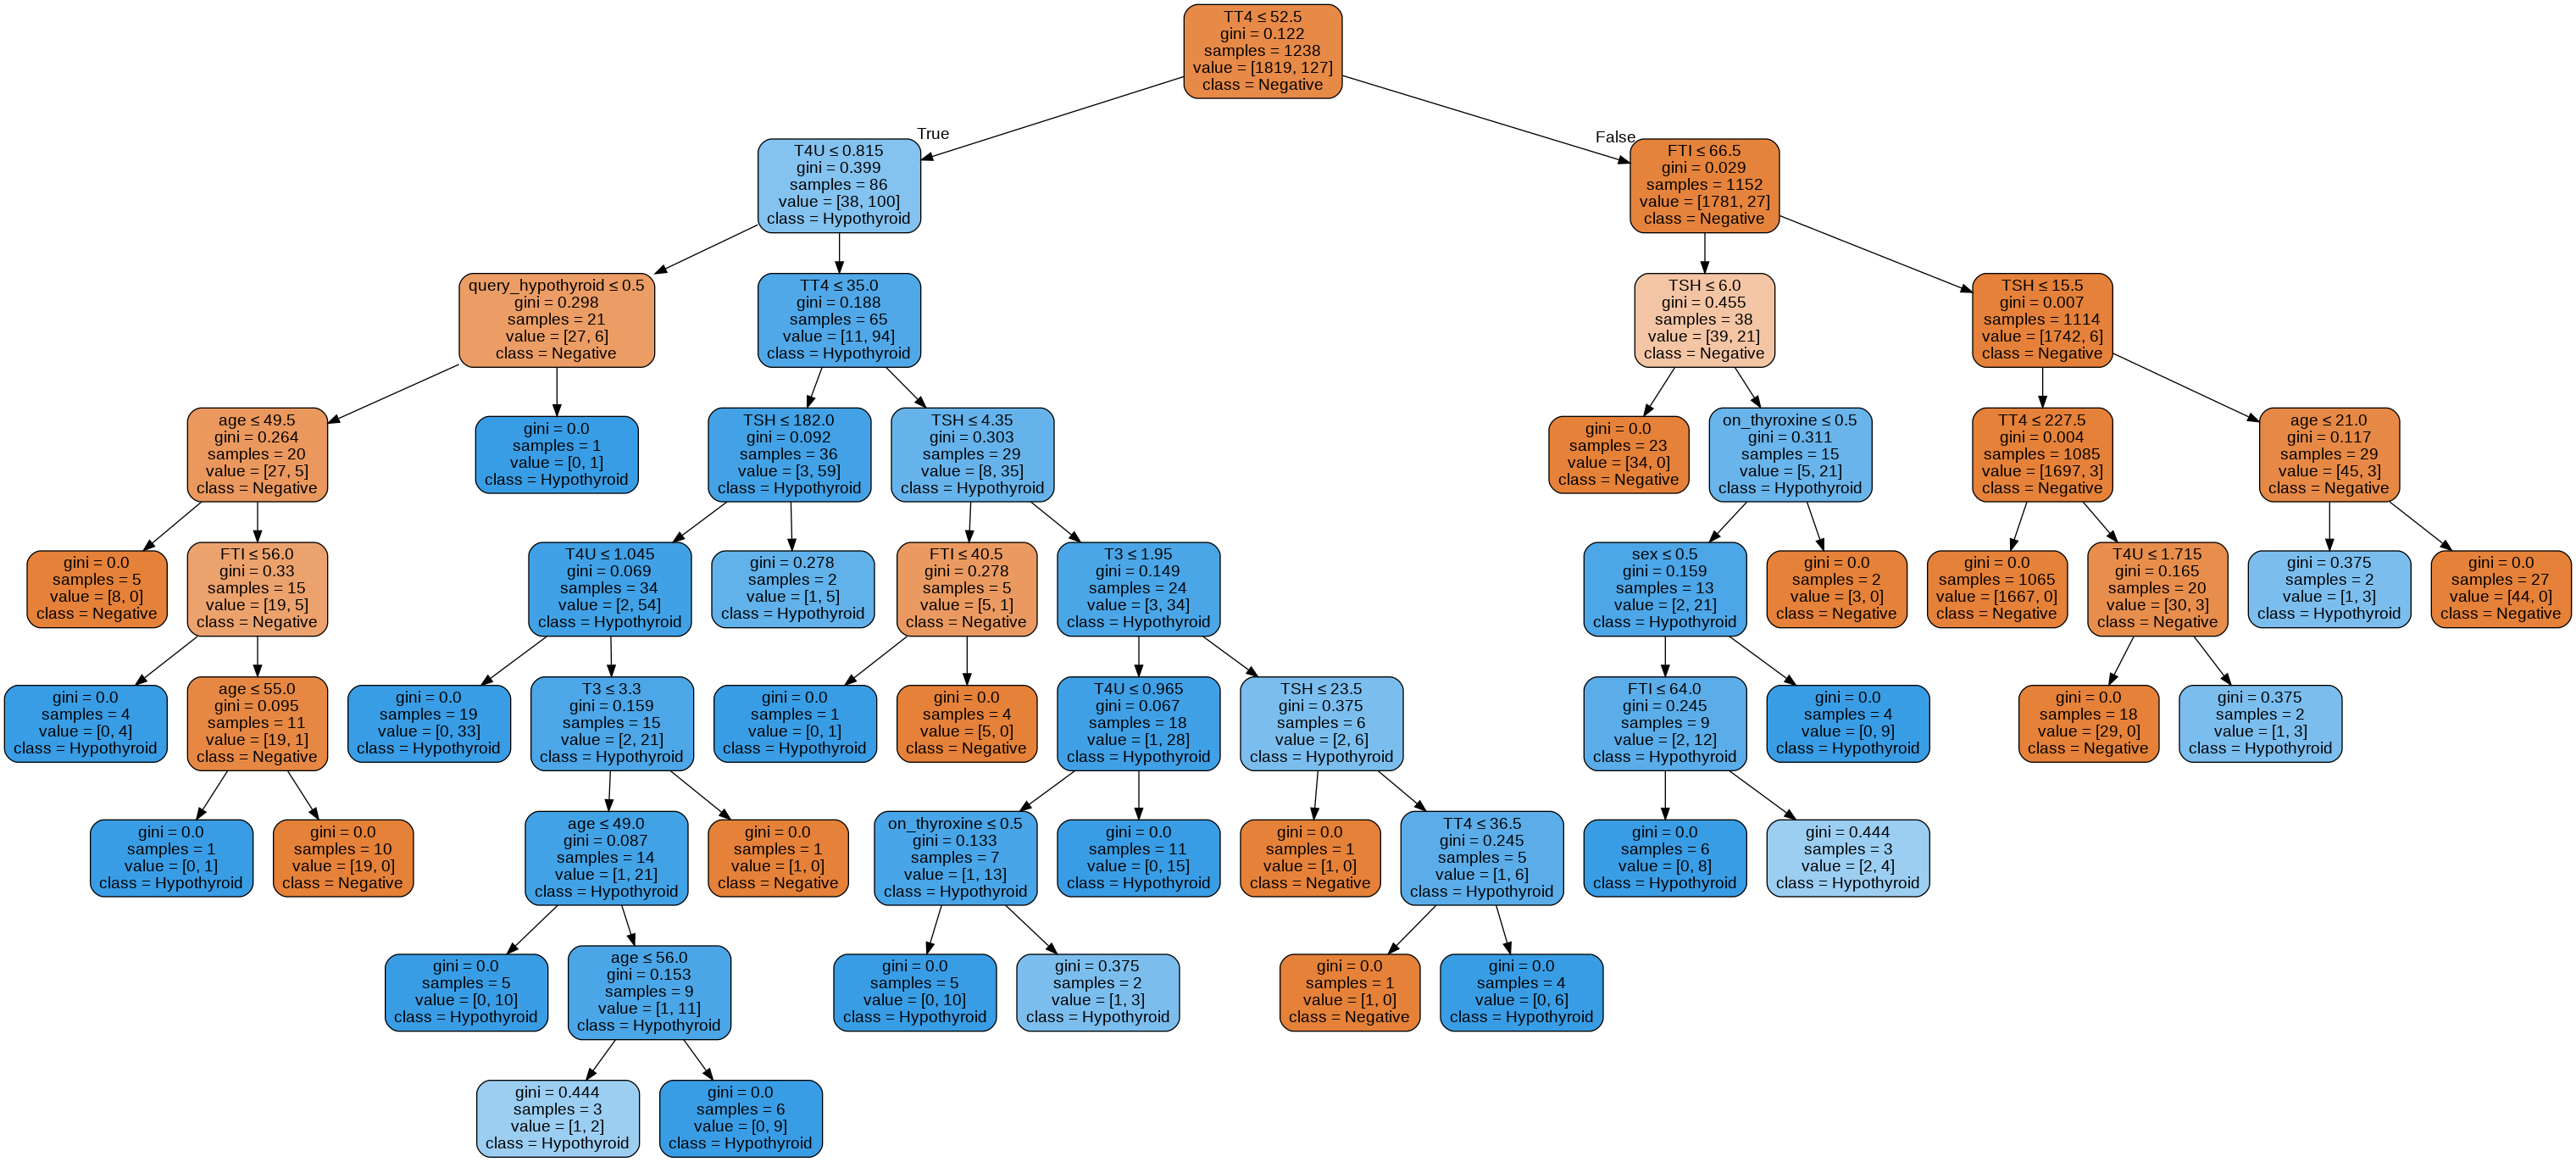

In [41]:
# In conclusion our random forest model is best with n_estimators = 150 , max_depth = 9 and min_sample_split = 4
best_rfc = RandomForestClassifier(n_estimators=150, max_depth=9, min_samples_split=4, random_state=23)
best_rfc.fit(X,y)

# Let's visualize one of our 150 tress
tree = best_rfc.estimators_[57]

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = hypothyroid.columns.tolist()[1:], class_names=['Negative', 'Hypothyroid'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('thyroid_forest_57.png')
Image(graph.create_png())

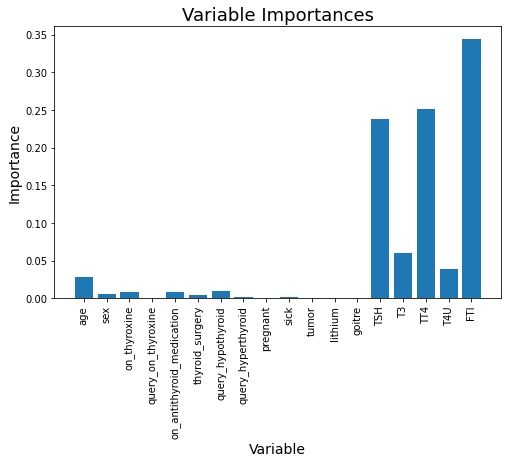

In [42]:
# Let's evaluate the importance of our features
# Making a list of the feature importance values
importance = list(best_rfc.feature_importances_)

# Making a bar chart to visualize importance of features
# List of x locations for plotting
x_values = list(range(len(importance)))

plt.figure(figsize=(8,5))
plt.bar(x_values, importance, orientation = 'vertical')
plt.xticks(x_values, hypothyroid.columns.tolist()[1:], rotation='vertical')
plt.ylabel('Importance', fontsize=14)
plt.xlabel('Variable', fontsize=14)
plt.title('Variable Importances', fontsize=18)
plt.show()

## 6.2 Ada Boost


In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Creating a funtion that will to model our data using different parameters for comparison and also implement cross validation
def ada_boost(n_estimators, max_depth):
  # We will be using 5 folds 
  folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=76)

  # To assess performance we will prioritize recall since the cost of a false negative is highest
  recall = []
  # We will then look at precision second because the cost of a false positive is also high
  precision = []
  # We can look at accuracy also
  accuracy = []

  for train_index, test_index in folds.split(X,y):
    # Setting up the train and test based on the split determined by KFold
    # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Training our model
    abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                           n_estimators=n_estimators, random_state=28)
    abc.fit(X_train,y_train)

    # Predict based on the model we've trained
    y_pred = abc.predict(X_test)

    # Evaluating the performance of our model
    recall_value = recall_score(y_test,y_pred)
    precision_value = precision_score(y_test, y_pred)
    accuracy_value = accuracy_score(y_test,y_pred)

    # Appending each of our scores to the list we made earlier
    recall.append(recall_value)
    precision.append(precision_value)
    accuracy.append(accuracy_value)

  # Finding the mean if the scores in the scores list
  recall_mean = round(Average(recall)*100, 2)
  precision_mean = round(Average(precision)*100, 2)
  accuracy_mean = round(Average(accuracy)*100, 2)
  
  return print(f'Average recall score = {recall_mean}% , Average precision score = {precision_mean}, Average accuracy score = {accuracy_mean}')

In [44]:
# Let's first try modelling with the default values: n_estimators = 50, max_depth = 1
ada_boost(n_estimators=50, max_depth=1)

Average recall score = 85.06% , Average precision score = 88.12, Average accuracy score = 98.46


This looks good but let's try other parameters


In [45]:
# Let's play around with n_estimators with max_depth at default
for i in np.linspace(50,500,10).astype(int):
  print(f'With n_estimators at {i}')
  ada_boost(n_estimators=i, max_depth=1)
  print(end="\n")

With n_estimators at 50
Average recall score = 85.06% , Average precision score = 88.12, Average accuracy score = 98.46

With n_estimators at 100
Average recall score = 79.64% , Average precision score = 85.66, Average accuracy score = 98.05

With n_estimators at 150
Average recall score = 82.33% , Average precision score = 86.92, Average accuracy score = 98.25

With n_estimators at 200
Average recall score = 80.55% , Average precision score = 87.38, Average accuracy score = 98.2

With n_estimators at 250
Average recall score = 81.42% , Average precision score = 85.87, Average accuracy score = 98.15

With n_estimators at 300
Average recall score = 82.33% , Average precision score = 86.01, Average accuracy score = 98.2

With n_estimators at 350
Average recall score = 82.37% , Average precision score = 87.81, Average accuracy score = 98.3

With n_estimators at 400
Average recall score = 81.5% , Average precision score = 86.74, Average accuracy score = 98.2

With n_estimators at 450
Avera

The best number of estimators is 50 cause it has the highest recall score. At more than 50 estimators our model overfits

In [46]:
# Let's play around with max_depth with n_estimators at 50
for i in range(2,11):
  print(f'With max depth at {i}')
  ada_boost(n_estimators=50, max_depth=i)
  print(end="\n")

With max depth at 2
Average recall score = 84.94% , Average precision score = 85.38, Average accuracy score = 98.25

With max depth at 3
Average recall score = 87.71% , Average precision score = 91.11, Average accuracy score = 98.77

With max depth at 4
Average recall score = 88.54% , Average precision score = 88.7, Average accuracy score = 98.66

With max depth at 5
Average recall score = 88.54% , Average precision score = 90.23, Average accuracy score = 98.77

With max depth at 6
Average recall score = 84.15% , Average precision score = 90.0, Average accuracy score = 98.51

With max depth at 7
Average recall score = 87.67% , Average precision score = 89.54, Average accuracy score = 98.66

With max depth at 8
Average recall score = 87.71% , Average precision score = 89.56, Average accuracy score = 98.66

With max depth at 9
Average recall score = 86.8% , Average precision score = 89.44, Average accuracy score = 98.61

With max depth at 10
Average recall score = 86.8% , Average precisi

Max depth is optimum at 5. At 4 recall is similar with at 5 but the precision is better at max_depth at 5.

In conclusion, our ada boost model works best with n_estimators = 50 and max_depth = 5. This gives us a recall of 88.54%

Comparing the random forest model with ada boost, ada boost was better with a recall score of 88.54% with random forest having a recall of 82.29%

## 6.3 Support Vector Machine

In [42]:
# According to the decision trees ['TSH', 'T3', 'TT4', 'T4U', 'FTI'] are the most important features so we will use them
# 
X_1 = hypothyroid.iloc[:,-5:].values
y_1 = np.where(hypothyroid['status'] == 'negative', 0, 1)

In [45]:
# Before we conduct SVM it is important that we scale our data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_1 = ss.fit_transform(X_1)

We will try different kernels with their default settings to see which one models our data best.

In [67]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
# Creating a function that does SVC with different kernels and returns scores
def classify(kernel):
  # Using SVC
  classifier = SVC(kernel=kernel, random_state=36)

  # Cross_validating our model with 5 folds
  scores = cross_validate(classifier, X_1, y_1, cv=5, 
                          scoring=('recall', 'precision', 'accuracy'))

  # Finding the average of our scores 
  recall = round((Average(scores['test_recall'].tolist()) *100),2)
  precision = round((Average(scores['test_precision'].tolist()) *100),2)
  accuracy = round((Average(scores['test_accuracy'].tolist()) *100),2)

  return print(f'With a {kernel} kernel: \nrecall = {recall}% \nprecision = {precision}% \naccuracy = {accuracy}%')

In [68]:
# Let's start with a linear kernel
classify(kernel='linear')

With a linear kernel: 
recall = 71.5% 
precision = 88.42% 
accuracy = 97.74%


In [69]:
# Polynomial kernel
classify(kernel='poly')

With a poly kernel: 
recall = 76.84% 
precision = 87.01% 
accuracy = 97.94%


In [70]:
# rbf kernel
classify(kernel='rbf')

With a rbf kernel: 
recall = 72.41% 
precision = 91.85% 
accuracy = 98.0%


Since we are prioritizing recall score, a poylnomial kernel works best. We can now tune the polynomial kernel parameters to see if we can improve performance.

In [76]:
from sklearn.model_selection import GridSearchCV
# Let's create a dictionary with the parameters we will test out
params = {
    'C': [0.1,1, 10, 100],
    'degree' : [2,3,4],
    'gamma': [1,0.1,0.01,0.001]   
}
grid = GridSearchCV(SVC(), param_grid = params, scoring='recall', cv=5, n_jobs=-1)
grid.fit(X_1,y_1)

print(f'The best parameters are {grid.best_params_}')
print(f'The best recall score is {round(grid.best_score_ * 100, 2)}%')

The best parameters are {'C': 10, 'degree': 2, 'gamma': 0.1}
The best recall score is 78.66%


So the best parameters to use with a polynomial kernel is C = 10, degree = 2, gamma = 0.1. Using these our recall improved from 76.84% to 78.66%